<br/>
<CENTER>
<font size="8"><br/> XVA - Project</font></br></div>
</CENTER>
<CENTER>
<font size="3"><br/>March 30, 2021</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue"><br/>Ghada BEN SAID </span>
</CENTER>
<CENTER>
<span style="color:blue"> Mame Diarra TOURE </span>
</CENTER>
<CENTER>
<span style="color:blue"> Houssem FENDI </span>
</CENTER>
<br/>
</div>

# Methode de regression gaussienne pour le calcul de la CVA
## Cas 1: Un seul facteur de risque
### Utilisation de la regression gaussienne pour le pricing d'option

In [1]:
pip install Quantlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from BlackScholes import *
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
import numpy as np
from BlackScholes import *
from GBMSim import *
from random import Random
from scipy import *

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
r = 0.0002  # risk-free rate
S= 100      # Underlying spot
KC = 130    # Call strike
KP = 70     # Put strike
sigma = 0.4 # implied volatility
T = 2.0     # Time to maturity

In [10]:
# define the call and put prices using the BS model
call = lambda x: bsformula(1, lb+(ub-lb)*x, KC, r, T, sigma, 0)[0]
put = lambda x: bsformula(-1, lb+(ub-lb)*x, KP, r, T, sigma, 0)[0]

# GP Call pricer

In [11]:
lb = 0.001           # lower bound on domain
ub = 300             # upper bound on domain
training_number = 5  # Number of training samples
testing_number = 100 # Number of testing samples

train_x_1 = np.array(np.linspace(0,1, training_number), dtype='float32').reshape(training_number, 1)
train_y_1 = []
for S in train_x_1:
    train_y_1.append(call(S))
    
test_x_1 = np.array(np.linspace(0,1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_1 = []
for S in test_x_1:
    test_y_1.append(call(S))

In [12]:
sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))  #100000.0
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_1,train_y_1)

GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=20)

In [13]:
y_pred_1, sigma_1 = gp.predict(test_x_1, return_std=True)

Text(0, 0.5, 'Call')

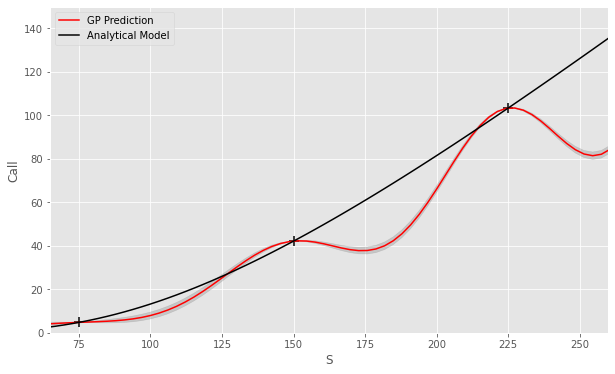

In [14]:
# predictionn plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_1, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_1, train_y_1, color = 'black', marker = '+', s = 100) 
plt.fill_between(lb+(ub-lb)*test_x_1.flatten(), (y_pred_1.T-2*sigma_1).flatten(), (y_pred_1.T+2*sigma_1).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlim([KC/2.0,2.0*KC])
plt.ylim([0,150])
plt.xlabel('S')
plt.ylabel('Call')

# GP Put pricer

In [15]:
train_x_2 = np.array(np.linspace(0,1, training_number), dtype='float32').reshape(training_number, 1)
train_y_2 = []
for S in train_x_2:
    train_y_2.append(put(S))
    
testing_number = 100
test_x_2 = np.array(np.linspace(0,1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_2 = []
for S in test_x_2:
    test_y_2.append(put(S))

In [16]:
sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0)) 
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_2,train_y_2)

GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=20)

In [17]:
y_pred_2, sigma_2 = gp.predict(test_x_2, return_std=True)

(0.0, 40.0)

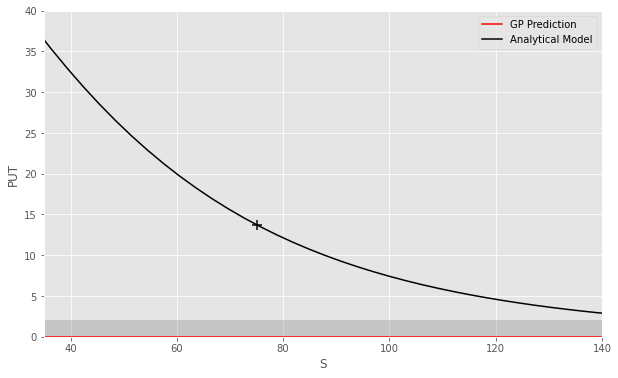

In [18]:
# prediction plot with var band 
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), y_pred_2, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), test_y_2, color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_2.flatten(), train_y_2, color = 'black', marker = '+', s = 100) 
plt.fill_between(lb+(ub-lb)*test_x_2.flatten(), (y_pred_2.T-2*sigma_2).flatten(), (y_pred_2.T+2*sigma_2).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlabel('S')
plt.ylabel('PUT')
plt.xlim([KP/2.0,2.0*KP])
plt.ylim([0,40])

# portfolio value

Text(0, 0.5, 'Portfolio value')

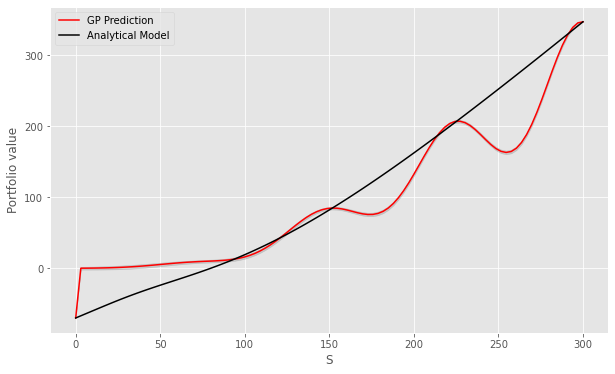

In [19]:
# portfolio prediction plot with var band 
y_pred = 2.0*y_pred_1 - y_pred_2 # long 2 calls and short a put
test_y = 2.0*np.array(test_y_1) - np.array(test_y_2)
sigma = np.sqrt(sigma_1*sigma_1 + sigma_2*sigma_2)
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), y_pred, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_2.flatten(), test_y.flatten(), color = 'black', label = 'Analytical Model')
plt.fill_between(lb+(ub-lb)*test_x_2.flatten(), (y_pred.T-2*sigma).flatten(), (y_pred.T+2*sigma).flatten(), color = 'grey', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlabel('S')
plt.ylabel('Portfolio value')

# CVA computation

In [20]:
def trainGPs(x_train, f, timegrid):

    gps = []
    i = 0
    for time in timegrid:
        
        y_train = []
        
        for idx in range(len(x_train)):
             y_train.append(f(x_train[idx], time))
        y_train = np.array(y_train)

        sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(0.01, 100.0))  #100000.0
        gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
        gp.fit(x_train,y_train)
        gps.append(gp)
        i += 1
    return gps  

In [21]:
def predictGPs(x_test, f, gps, timegrid):
    
    preds = []
    stds = []
    y_tests = []
    i = 0
    for time in timegrid:
        
        y_test_= []
        for idx in range(len(x_test)):
            y_test_.append(f(x_test[idx], time))
            
        y_test = np.array(y_test_)
        y_tests.append(y_test)
        
        # Find optimal model hyperparameters
        # Set into eval mode
        pred, std = gps[i].predict(x_test,return_std=True)
        preds.append(pred)
        stds.append(std)
        i+=1
    return y_tests, preds, stds 

In [22]:
# specify the portfolio
KC = 110    # Call strike
KP = 90     # Put strike
lb = 0.01
ub = 400
r  = 0
sigma = 0.3
nt = 11
T = 2.0
S0 = 100
timegrid = np.array(np.linspace(0.0,T,nt), dtype='float32').reshape(nt, 1)


portfolio = {}
portfolio['call']={}
portfolio['put']={}

portfolio['call']['price']= lambda x,y: bsformula(1, lb+(ub-lb)*x, KC, r, y, sigma, 0)[0]
portfolio['put']['price']= lambda x,y: bsformula(-1, lb+(ub-lb)*x, KP, r, y, sigma, 0)[0]
portfolio['call']['weight']=2.0
portfolio['put']['weight']=-1.0
# prepare training and test data
training_number= 100
testing_number = 50
x_train = np.array(np.linspace(0.0,1.0, training_number), dtype='float32').reshape(training_number, 1)
x_test = np.array(np.linspace(0.0,1.0, testing_number), dtype='float32').reshape(testing_number, 1)
# train and predict over portfolio
for key in portfolio.keys():
    portfolio[key]['GPs'] = trainGPs(x_train, portfolio[key]['price'], timegrid)
    portfolio[key]['y_tests'], portfolio[key]['preds'], portfolio[key]['sigmas'] = predictGPs(x_test, portfolio[key]['price'], portfolio[key]['GPs'], timegrid)
    

In [23]:
def CVA_simulation(sim_params, model_params, def_model):
    
    n_sim_dt = sim_params['n_sim_dt'] # number of Euler stpes
    M        = sim_params['M']        # number of paths
    nt       = sim_params['nt']       # number of exposure dates
    timegrid = sim_params['timegrid'] # time grid of exposure dates
    
    r        = model_params['r']
    sigma    = model_params['sigma']
    T        = model_params['T'] 
    t0       = model_params['t0'] 
    S0       = model_params['S0'] 
    
    gamma_0  = def_model['gamma_0']
    gamma_1  = def_model['gamma_1']
    
    
    stride = n_sim_dt/(nt-1)
    idx = np.arange(0,n_sim_dt+1,stride, dtype=int)
    
    pi = {}
    pi['tilde'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     # GP portfolio value
    pi['exact'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     # BS portfolio value
    pi['tilde_var'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M) # GP portfolio variance
    gamma = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)           # hazard rates
    dPD = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)             # default probabilities
    
    #simulate underlying GBM dynamics using Euler
    S = gbm(S0, r, sigma, T-t0, n_sim_dt, M)
    
    if (def_model['calibrate']):
        x  = np.exp(S0/S)**gamma_1
        # default probability (assumed to be estimated from credit spread)
        dt = timegrid[1]-timegrid[0] 
        f  = lambda y: np.abs(np.mean(np.prod(x**(-y*dt), axis=0)) - def_model['p']) 
        res = sp.optimize.basinhopping(f, 0.1, niter=10)
        i = 1   
        while (abs(res.fun) >1e-3):   
          res = sp.optimize.basinhopping(f, 0.1, niter=100*i)
          i *= 2
        gamma_0= res.x[0]
        print("calibration:", gamma_0, gamma_1, f(gamma_0), res.fun)  
    
    
    for m in range(M):  
      i = 1 
      exp_factor=1
        
      for time in timegrid[1:]:
        dt = timegrid[i]-timegrid[i-1] 
        
        S_= S[idx[i],m] # simulated S
        # avoid simulated S breaching boundaries of domain
        if (S_<lb):
            mins=S_
            S_=lb
        if (S_>ub):
            S_=ub
            maxs=S_
    
        pred_= 0
        v_ = 0
        var_ =0 
    
        for key in portfolio.keys():
           pred, std = portfolio[key]['GPs'][i].predict(np.array([(S_-lb)/(ub-lb)]).reshape(1,-1),return_std=True) 
           pred_ += portfolio[key]['weight']*pred
           var_ += (portfolio[key]['weight']*std)**2 
       
           if key=='call':
              v_ += portfolio[key]['weight']*bsformula(1, S_, KC, r, time, sigma, 0)[0]
           else:
              v_ += portfolio[key]['weight']*bsformula(-1, S_, KP, r, time, sigma, 0)[0]
        pi['tilde'][i-1,m] = np.maximum(pred_,0)
        pi['exact'][i-1,m] = np.maximum(v_,0)
        pi['tilde_var'][i-1,m] =var_ 
          
        # default intensity model
        gamma[i-1,m] = gamma_0*(S0/S_)**gamma_1    
        
        # compute default probabilities  
        exp_factor*=np.exp(-dt*gamma[i-1,m])    
        dPD[i-1,m]= gamma[i-1,m]*exp_factor
        
        i += 1
    # compute CVA
    i = 0
    CVA ={}
    CVA['tilde'] = 0
    CVA['exact'] = 0
    CVA['tilde_up'] = 0
    CVA['tilde_down'] = 0
   
    for time in timegrid[1:]:
        dt = timegrid[i+1]-timegrid[i]
        mu_tilde = np.mean(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt
        CVA['tilde'] += mu_tilde
        std_err_MC = np.std(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt/np.sqrt(M)
        CVA['tilde_up'] += mu_tilde + 2.0*std_err_MC
        CVA['tilde_down'] += mu_tilde - 2.0*std_err_MC
        CVA['exact'] += np.mean(dPD[i,:]*pi['exact'][i,:])*np.exp(-r*(time-t0))*dt
        i+=1
    CVA['tilde'] *= (1-def_model['recovery'])
    CVA['tilde_up'] *= (1-def_model['recovery'])
    CVA['tilde_down'] *= (1-def_model['recovery'])
    CVA['exact'] *= (1-def_model['recovery'])
        
    return(CVA, pi)

In [24]:
sim_params = {}
model_params = {}
def_model = {}
  
model_params['r'] = r        # risk-free rate
model_params['sigma'] = sigma  # implied volatility
model_params['T'] = T        # Time to maturity 
model_params['t0'] = 0
model_params['S0'] = S0     # Underlying spot
     
# parameters to the default intensity model    
def_model['gamma_0'] = 0.01
def_model['gamma_1'] = 1.2
def_model['calibrate'] = False    
def_model['recovery'] = 0.4

sim_params['n_sim_dt'] = 100 # number of Euler stpes
sim_params['M']  = 1000      # number of paths
sim_params['nt'] = nt        # number of exposure dates

sim_params['timegrid']= timegrid # time grid of exposure dates
# train and predict over portfolio
for key in portfolio.keys():
    portfolio[key]['GPs'] = trainGPs(x_train, portfolio[key]['price'], timegrid)
    portfolio[key]['y_tests'], portfolio[key]['preds'], portfolio[key]['sigmas'] = predictGPs(x_test, portfolio[key]['price'], portfolio[key]['GPs'], timegrid)

CVA_0, pi = CVA_simulation(sim_params, model_params, def_model)

In [25]:
CVA_0

{'tilde': array([0.17484637], dtype=float32),
 'exact': array([0.1748464], dtype=float32),
 'tilde_up': array([0.18945223], dtype=float32),
 'tilde_down': array([0.1602405], dtype=float32)}

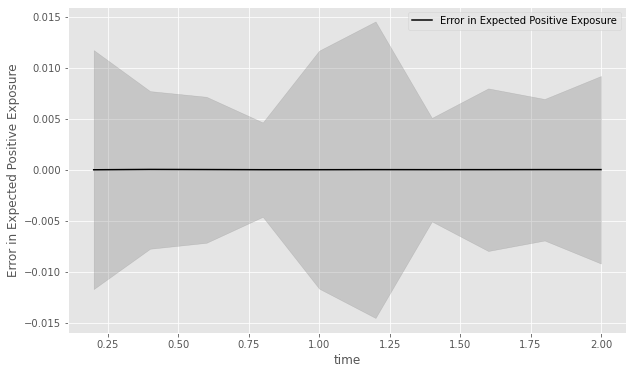

In [26]:
# Error plot
up = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)+2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 
down = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)- 2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 

plt.figure(figsize = (10,6),facecolor='white', edgecolor='black')
plt.plot(timegrid[1:], np.mean(pi['exact'], axis=1)-np.mean(pi['tilde'], axis=1), color = 'black', label = 'Error in Expected Positive Exposure')
plt.fill_between(timegrid[1:].flatten(), np.array(down), np.array(up), color = 'grey', alpha=0.3)
plt.grid(True)
#plt.xlim(90, 110)
plt.xlabel('time')
plt.ylabel('Error in Expected Positive Exposure')
plt.legend(loc = 'best', prop={'size':10})

# Cas 2: Plusieurs facteurs de risques.
## pricing d'une option basket sur 10 sous jacents

In [1]:
import numpy as np
#from BlackScholes import *
#from GBMSim import *
from random import Random
from scipy import *

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')
import numpy as np

from random import Random
from scipy import *

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sb
import seaborn as sns
import statsmodels.api as sm

import keras


from sklearn import  utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import *
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor
#%run lr_finder.ipynb 
import numpy as np
import scipy.stats as si
import scipy.integrate
from cmath import *
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from numpy import *
from sklearn.cluster import KMeans
from matplotlib import animation
from scipy.interpolate import interp2d
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import keras

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import backend as K
import tensorflow.python.keras.engine
from keras.layers import Embedding , GlobalAveragePooling1D
from keras.datasets import imdb
from keras.utils.generic_utils import get_custom_objects
keras.backend.set_floatx('float64')

In [4]:
import scipy.stats as st
import numpy as np
import math

def bsformula(cp, s, k, rf, t, v, div):
        """ Price an option using the Black-Scholes model.
        cp: +1/-1 for call/put
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        div: dividend
        """

        d1 = (np.log(s/k)+(rf-div+0.5*v*v)*t)/(v*np.sqrt(t))
        d2 = d1 - v*np.sqrt(t)

        optprice = (cp*s*np.exp(-div*t)*st.norm.cdf(cp*d1)) - (cp*k*np.exp(-rf*t)*st.norm.cdf(cp*d2))
        delta = cp*st.norm.cdf(cp*d1)
        vega  = s*np.sqrt(t)*st.norm.pdf(d1)
        return optprice, delta, vega
import numpy as np
""" Simulate dynamics under GBM """ 

def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S

In [5]:
import numpy as np
""" Simulate dynamics under GBM """ 

def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S
def trainGPs(x_train, f, timegrid):

    gps = []
    i = 0
    for time in timegrid:
        
        y_train = []
        
        for idx in range(len(x_train)):
             y_train.append(f(x_train[idx][0], time+0.001))
        y_train = np.array(y_train)

        sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(0.01, 100.0))  #100000.0
        gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
        gp.fit(x_train,y_train)
        gps.append(gp)
        i += 1
    return gps  
def predictGPs(x_test, f, gps, timegrid):
    
    preds = []
    stds = []
    y_tests = []
    i = 0
    for time in timegrid:
        
        y_test_= []
        for idx in range(len(x_test)):
            y_test_.append(f(x_test[idx][0], time+0.001))
            
        y_test = np.array(y_test_)
        y_tests.append(y_test)
        
        # Find optimal model hyperparameters
        # Set into eval mode
        pred, std = gps[i].predict(x_test,return_std=True)
        preds.append(pred)
        stds.append(std)
        i+=1
    return y_tests, preds, stds
def GenerateCorrelatedPaths(processArray, timeGrid, nPaths):
    times = []; [times.append(timeGrid[t]) for t in range(len(timeGrid))]
    generator = UniformRandomGenerator()
    nProcesses = processArray.size()
    nGridSteps = len(times) - 1 # deduct initial time (0.0)
    nSteps = nGridSteps * nProcesses
    sequenceGenerator = UniformRandomSequenceGenerator(nSteps, generator)
    gaussianSequenceGenerator = GaussianRandomSequenceGenerator(sequenceGenerator)
    multiPathGenerator = GaussianMultiPathGenerator(processArray, times, gaussianSequenceGenerator)
    paths = np.zeros(shape = (nPaths, nProcesses, len(timeGrid)))

    # loop through number of paths
    for i in range(nPaths):
        # request multiPath, which contains the list of paths for each process
        multiPath = multiPathGenerator.next().value()
        # loop through number of processes
        for j in range(multiPath.assetNumber()):
            # request path, which contains the list of simulated prices for a process
            path = multiPath[j]
            # push prices to array
            paths[i, j, :] = np.array([path[k] for k in range(len(path))])
    return paths
def generatepath(nProcesses,correlation,nPaths,nSteps, mue, spot, sigma,maturity):
    # mue est un veceteur de taille le nombre de processs
    # sigma aussi 
    #
    #
    process = []
    [process.append(GeometricBrownianMotionProcess(spot, mue, sigma)) for i in range(nProcesses)]

    cor=correlation
    matrix =[[1.0, cor,cor,cor,cor,cor,cor,cor,cor,cor], 
         [ cor,1.0,cor,cor,cor,cor,cor,cor,cor,cor],
         [ cor,cor,1.0,cor,cor,cor,cor,cor,cor,cor],
         [ cor,cor,cor,1.0,cor,cor,cor,cor,cor,cor],
         [cor,cor,cor,cor,1.0, cor,cor,cor,cor,cor],
         [ cor,cor,cor,cor,cor,1.0,cor,cor,cor,cor],
         [cor,cor,cor,cor,cor,cor,1.0,cor, cor,cor],
         [ cor,cor,cor,cor,cor,cor,cor,1.0,cor,cor],
         [ cor,cor,cor,cor,cor,cor,cor,cor,1.0,cor],
         [cor,cor,cor,cor,cor,cor,cor,cor,cor, 1.0]]


# create timegrid object and define number of paths
    
    timeGrid = TimeGrid(maturity, nSteps)

    # create StochasticProcessArray object
    # (array of correlated 1-D stochastic processes)
    processArray = StochasticProcessArray(process, matrix)
    # request simulated correlated paths for all processes
    # result array dimensions: nPaths, nProcesses, len(timeGrid)
    paths = GenerateCorrelatedPaths(processArray, timeGrid, nPaths)
    return (paths)

def price_basket(cp,mue,sigma, spot, K,maturity,nPaths,nProcesses, correlation,nSteps):
    paths= generatepath(nProcesses,correlation,nPaths,nSteps, mue, spot, sigma,maturity)
    final=paths[:,:,nSteps]
    a=[0]*nPaths
    if(cp==1): #on a un put
        for i in range(nPaths): # pour chaque chemin je recupére lesvaluers finaux des 10 stock et je prend la moyenne arithmetique
            a[i]=max(mean(final[i])-K,0) # pour chaque path je calcule le max(mean(final[i])-K ,0)
           # print(max(final[i]))
    else:
        for i in range(nPaths): # pour chaque chemin je recupére lesvaluers finaux des 10 stock et je prend la moyenne arithmetique
            a[i]=max(K-mean(final[i]),0) # pour chaque path je calcule le max(mean(final[i])-K ,0)
           # print(max(final[i]))
    price=mean(a)
    return (np.exp(-mue*maturity)*price)



In [6]:
from QuantLib import *
import numpy as np

import time as ti
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF
nProcesses = 10
correlation = 0.7
maturity = 2
nSteps = 11
nPaths = 1500
mue=0.01
sigma=0.25
spot=100
K=100

In [7]:
# specify the portfolio
KC = 110    # Call strike
KP = 90     # Put strike
lb = 0.01
ub = 400
r  = 0
sigma = 0.3
nt = 11
T = 2.0
S0 = 100
timeGrid = TimeGrid(maturity, nSteps)


portfolio = {}
portfolio['call']={}
portfolio['put']={}

portfolio['call']['price']= lambda x,y:price_basket(1,mue,sigma, lb+(ub-lb)*x, K,y,nPaths,nProcesses, correlation,nSteps)
portfolio['put']['price']= lambda x,y: price_basket(-1,mue,sigma, lb+(ub-lb)*x, K,y,nPaths,nProcesses, correlation,nSteps)
portfolio['call']['weight']=2.0
portfolio['put']['weight']=-1.0

In [8]:
# prepare training and test data
training_number= 100
testing_number = 50
x_train = np.array(np.linspace(0.0,1.0, training_number), dtype='float32').reshape(training_number, 1)
x_test = np.array(np.linspace(0.0,1.0, testing_number), dtype='float32').reshape(testing_number, 1)

In [9]:
start=ti.time()
for key in portfolio.keys():
    portfolio[key]['GPs'] = trainGPs(x_train, portfolio[key]['price'], timeGrid)
    portfolio[key]['y_tests'], portfolio[key]['preds'], portfolio[key]['sigmas'] = predictGPs(x_test, portfolio[key]['price'], portfolio[key]['GPs'], timeGrid)
end0 = ti.time() 
print("l'entrainement des GP dure ")
print((end0 - start))

l'entrainement des GP dure 
389.31673789024353


In [10]:
from sklearn.metrics import mean_squared_error
import math
 
MSECALL = mean_squared_error(np.array(portfolio['call']['y_tests']), np.array(portfolio['call']['preds']))
MSEPUT= mean_squared_error(np.array(portfolio['put']['y_tests']), np.array(portfolio['put']['preds']))


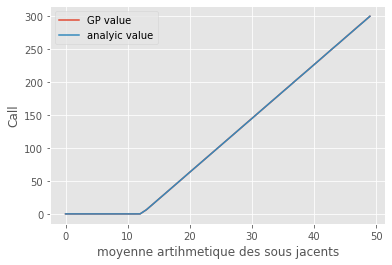

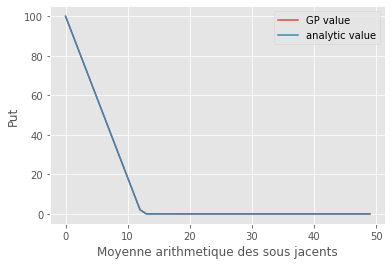

In [11]:
plt.plot(portfolio['call']['y_tests'][0],label='GP value')
plt.plot(portfolio['call']['preds'][0],label='analyic value')
plt.legend()
plt.ylabel('Call')
plt.xlabel('moyenne artihmetique des sous jacents')
plt.show()

plt.plot(portfolio['put']['preds'][0],label='GP value')
plt.plot(portfolio['put']['y_tests'][0],label='analytic value')
plt.legend()
plt.ylabel('Put')
plt.xlabel('Moyenne arithmetique des sous jacents')
plt.show()

   

In [12]:
MSECALL= mean_squared_error(portfolio['put']['preds'][0],portfolio['put']['y_tests'][0])
MSEPUT=mean_squared_error(portfolio['call']['preds'][0],portfolio['call']['y_tests'][0])
print('MSE call  basket',math.sqrt(MSECALL))
print('MSE put basket',math.sqrt(MSEPUT))

MSE call  basket 0.015285023513305384
MSE put basket 0.06891216941188939


In [13]:
def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S

## Calcul de la CVA pour le portfeuille avec 10 actifs sous jacents

In [40]:
def CVA_simulation(sim_params, model_params, def_model):
    
    n_sim_dt = sim_params['n_sim_dt'] # number of Euler stpes
    M        = sim_params['M']        # number of paths
    nt       = sim_params['nt']       # number of exposure dates
    timegrid = sim_params['timegrid'] # time grid of exposure dates
    
    r        = model_params['r']
    sigma    = model_params['sigma']
    T        = model_params['T'] 
    t0       = model_params['t0'] 
    S0       = model_params['S0'] 
    
    gamma_0  = def_model['gamma_0']
    gamma_1  = def_model['gamma_1']
    
    
    stride = n_sim_dt/(nt-1)
    idx = np.arange(0,n_sim_dt+1,stride, dtype=int)
    
    pi = {}
    pi['tilde'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     # GP portfolio value
    pi['exact'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     #  portfolio value
    pi['tilde_var'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M) # GP portfolio variance
    gamma = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)           # hazard rates
    dPD = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)             # default probabilities
    
    #simulate underlying GBM dynamics using Euler
    S = gbm(S0, r, sigma, T-t0, n_sim_dt, M)
    
    if (def_model['calibrate']):
        x  = np.exp(S0/S)**gamma_1
        # default probability (assumed to be estimated from credit spread)
        dt = timegrid[1]-timegrid[0] 
        f  = lambda y: np.abs(np.mean(np.prod(x**(-y*dt), axis=0)) - def_model['p']) 
        res = sp.optimize.basinhopping(f, 0.1, niter=10)
        i = 1   
        while (abs(res.fun) >1e-3):   
          res = sp.optimize.basinhopping(f,0.1,niter=100*i)
          i *= 2
        gamma_0= res.x[0]
        print("calibration:",gamma_0,gamma_1,f(gamma_0),res.fun)  
  
    start=ti.time()
    for m in range(M):  
      i = 1 
      exp_factor=1
        
      for time in timegrid[1:]:
        dt = timegrid[i]-timegrid[i-1] 
        
        S_= S[idx[i],m] # simulated S
        # avoid simulated S breaching boundaries of domain
        if (S_<lb):
            mins=S_
            S_=lb
        if (S_>ub):
            S_=ub
            maxs=S_
    
        pred_= 0
        v_ = 0
        var_ =0 
        start0 = ti.time()
        for key in portfolio.keys():
           pred, std = portfolio[key]['GPs'][i].predict(np.array([(S_-lb)/(ub-lb)]).reshape(1,-1),return_std=True) 
           pred_ += portfolio[key]['weight']*pred
           var_ += (portfolio[key]['weight']*std)**2 
        end0 = ti.time() 
        start1 = ti.time()
        for key in portfolio.keys():
            if key=='call':
                v_ += portfolio[key]['weight']*price_basket(1,r,sigma,S_.item(),KC,time[0].item() ,nPaths,nProcesses, correlation,nSteps)
            else:
                v_ += portfolio[key]['weight']*price_basket(-1,r,sigma,S_.item(),KP,time[0].item(),nPaths,nProcesses, correlation,nSteps)
        end1 = ti.time()  
                
        pi['tilde'][i-1,m] = np.maximum(pred_,0)
        pi['exact'][i-1,m] = np.maximum(v_,0)
        pi['tilde_var'][i-1,m] =var_ 
          
        # default intensity model
        gamma[i-1,m] = gamma_0*(S0/S_)**gamma_1    
        
        # compute default probabilities  
        exp_factor*=np.exp(-dt*gamma[i-1,m])    
        dPD[i-1,m]= gamma[i-1,m]*exp_factor
        
        i += 1
  
    print("LA predicition avec les GP dure  ")
    print((end0 - start0)*M) 
    print("le benchmark  dure")
    print((end1- start1)*M) 
    # compute CVA
    i = 0
    CVA ={}
    CVA['tilde'] = 0
    CVA['exact'] = 0
    CVA['tilde_up'] = 0
    CVA['tilde_down'] = 0
   
    for time in timegrid[1:]:
        dt = timegrid[i+1]-timegrid[i]
        mu_tilde = np.mean(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt
        CVA['tilde'] += mu_tilde
        std_err_MC = np.std(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt/np.sqrt(M)
        CVA['tilde_up'] += mu_tilde + 2.0*std_err_MC
        CVA['tilde_down'] += mu_tilde - 2.0*std_err_MC
        CVA['exact'] += np.mean(dPD[i,:]*pi['exact'][i,:])*np.exp(-r*(time-t0))*dt
        i+=1
    CVA['tilde'] *= (1-def_model['recovery'])
    CVA['tilde_up'] *= (1-def_model['recovery'])
    CVA['tilde_down'] *= (1-def_model['recovery'])
    CVA['exact'] *= (1-def_model['recovery'])
        
    return(CVA, pi)

In [41]:
sim_params = {}
model_params = {}
def_model = {}
  
model_params['r'] = r        # risk-free rate
model_params['sigma'] = sigma  # implied volatility
model_params['T'] = maturity        # Time to maturity 
model_params['t0'] = 0
model_params['S0'] = S0     # Underlying spot
     
# parameters to the default intensity model    
def_model['gamma_0'] = 0.01
def_model['gamma_1'] = 1.2
def_model['calibrate'] = False    
def_model['recovery'] = 0.4

sim_params['n_sim_dt'] = 100 # number of Euler stpes
sim_params['M']  = 200     # number of paths
sim_params['nt'] = nt        # number of exposure dates
timegrid = np.array(np.linspace(0.0,T,nt), dtype='float32').reshape(nt, 1)
sim_params['timegrid']= timegrid # time grid of exposure dates

In [42]:
# train and predict over portfolio

CVA_0, pi = CVA_simulation(sim_params, model_params, def_model)



LA predicition avec les GP dure  
0.06704330444335938
le benchmark  dure
41.75901412963867
le calcul de la CVA dure


NameError: name 'end' is not defined

### Remarque 
On voit que l'entrainement des GP dure longtemps (400s) environ mais que une fois l'entrainement effectué la prediction elle dure 0.05 seconde alors que le calcul par la méthode de Monte Carlo(benchmark) elle dure 42 secondes.

In [43]:
CVA_0

{'tilde': array([0.1839538], dtype=float32),
 'exact': array([0.13952163], dtype=float32),
 'tilde_up': array([0.21985865], dtype=float32),
 'tilde_down': array([0.14804895], dtype=float32)}

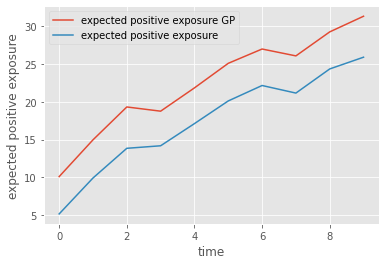

In [44]:
vect=[np.mean(pi['tilde'][i]) for i in range(10)]
vect1=[np.mean(pi['exact'][i]) for i in range(10)]
temps=range(nt-1)
plt.plot(temps,vect,label='expected positive exposure GP')
plt.plot(temps,vect1,label='expected positive exposure')
plt.xlabel('time')
plt.ylabel('expected positive exposure')
plt.legend()

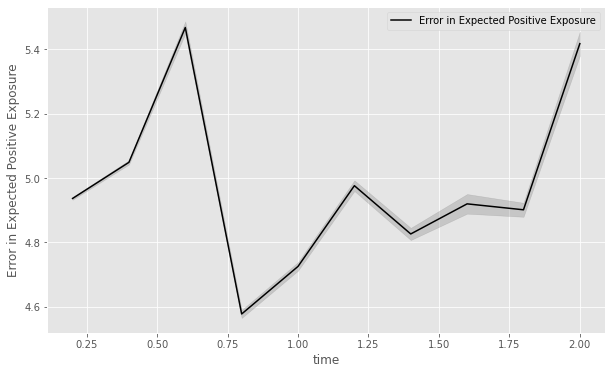

In [45]:
# Error plot
up = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)+2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 
down = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)- 2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 

plt.figure(figsize = (10,6),facecolor='white', edgecolor='black')
plt.plot(timegrid[1:], np.mean(pi['tilde'], axis=1)-np.mean(pi['exact'], axis=1), color = 'black', label = 'Error in Expected Positive Exposure')
plt.fill_between(timegrid[1:].flatten(), np.array(down), np.array(up), color = 'grey', alpha=0.3)
plt.grid(True)
#plt.xlim(90, 110)
plt.xlabel('time')
plt.ylabel('Error in Expected Positive Exposure')
plt.legend(loc = 'best', prop={'size':10})

